In [2]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib notebook

import time

In [3]:
# Add code to the following function so that it takes in two datasets, loops over one of them, 
#and finds information about the nearest neighbors in the other dataset, based on a flag. 

def nn(data0,data1,r=None,nneighbors=None):
    
    ret = -1
    ret_list=[]
    
    if r is not None and nneighbors is not None:
        
        print "Both r and nneighbors cannot be set! Only one can be!"
        exit(-1)
        return ret
    
    elif r is not None and nneighbors is None:
        # Calculate the number of nearest neighbors in data1 to each point in data0
        # within a "radius" r. Normalize by the total number of points in data1
        start = time.time()
        for num0 in data0:
            count=0
            diff = np.abs(num0 - data1)
            count = len(diff[diff<r])
            ret_list.append(float(count)/float(len(data1)))
        print "Time to calculate nearest neighbors %f seconds" % (time.time()-start)
        return ret_list
    
    elif r is None and nneighbors is not None:
        # Calculate how big of a "radius" you need to go out to find nneighbors in data1 
        # for each point in data0. Return the inverse of that radius.
        start = time.time()
        for num0 in data0:
            diff = np.abs(num0 - data1)
            #diff=sorted(diff)
            diff.sort()
            radius= diff[nneighbors-1]
            ret_list.append(1/radius)
        print "Time to calculate inverse radius %f seconds" % (time.time()-start)
        return ret_list
    
    return ret

In [4]:
#np.random.seed(1)
data0 = np.random.normal(5,1,1000)
data1 = np.random.normal(5,1,10000)

In [5]:
density = nn(data0,data1,r=0.2)

radius_density = nn(data0,data1,nneighbors=200)

#print density
#print radius_density

Time to calculate nearest neighbors 0.052382 seconds
Time to calculate inverse radius 0.450470 seconds


In [207]:
#density = nn(data0,data1,r=0.2)

#radius_density = nn(data0,data1,nneighbors=200)

#print density

#radius_density = nn(data0,data1,nneighbors=2)

#print radius_density


<IPython.core.display.Javascript object>


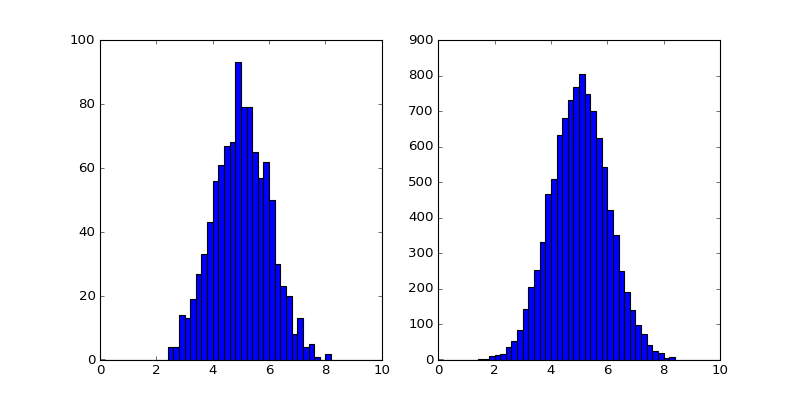

In [6]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.hist(data0,bins=50,range=(0,10));
plt.subplot(1,2,2)
plt.hist(data1,bins=50,range=(0,10));

<IPython.core.display.Javascript object>


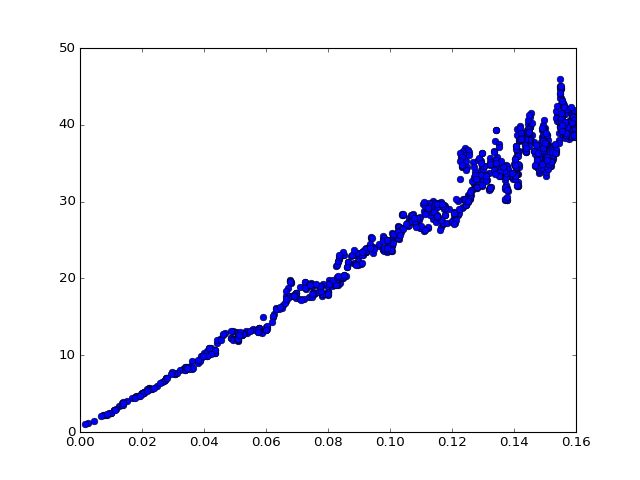

In [7]:
plt.figure()
plt.plot(density,radius_density,'o')
